[View in Colaboratory](https://colab.research.google.com/github/bitcointroy/MLcodechallenges/blob/master/Troy_Bradley_Copy_of_AUC_Coding_Challenge.ipynb)

# Area-Under-Curve Measurement

Objectives:
* Compute true positive, true negative, false positive, and false negative classification rate
* Adjust classification threshold to control above rates
* Plot AUC  to demonstrate accuracy
* Calculate AUC as a single value

### Background

You want to be familiar with ROC and AUC.

#### Receiver Operating Characteristic Curve (ROC)

[wikipedia](https://en.wikipedia.org/wiki/Receiver_operating_characteristic)
[Precision and Recall](https://en.wikipedia.org/wiki/Precision_and_recall) [sklearn](http://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html)

#### Area Under Curve (AUC)

[sklearn](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.auc.html)

The ROC curve provides a visualization of the performance of a classifier, with false-positive rates along the $x$ axis and true-positive rates along the $y$ axis. A perfect classifier produces no false positives (100% specificity) and no false negatives (100% sensitivity). In reality, classifiers are not so discerning.

### Do:

Correct the bugs in the following code blocks in order to work through the mechanics of building an AUC. 

Once you've calculated `FPR` and `TPR` for the Logistic Regression classifier on its Sprint Challenge dataset and visualized the results, modify it to compute the same data using the _test_ data, instead of the _train_ data.

### 1. Compute Linear Regression Model

Create a training set and train a Logistic Regression model with it

In [2]:
import numpy as np

#import necessary libraries
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

data = pd.read_csv('https://www.dropbox.com/s/bnwfu81bjpf22hp/logistic_regression.csv?raw=1')
# Use train_test_split to create a training set
train_x, test_x, train_y, test_y = train_test_split(data[['x1','x2']],data['y'])

# Create and train(fit) the model
regr = LogisticRegression()
regr.fit(train_x, train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### 2. Predict values for $\hat{y}$ for the test set

In [3]:
# Predict y_hat for the test set created previously

y_hat = regr.predict(train_x)
print(y_hat)

[1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0.
 1. 1. 0. 0. 0. 1.]


### Observe precision

In [5]:
# True positive: if the prediction is 1, and the original data is 1, their sum is 2
true_positives = (y_hat+train_y)==2
# False positive: if the prediction is 1, but the original data is 0, their sum is 1
false_positives = (y_hat-train_y)==1
print(true_positives.T)
print(false_positives.T)

31     True
26     True
27     True
1     False
21     True
13    False
25     True
22     True
29     True
5     False
4     False
30    False
28    False
33     True
0     False
6     False
32     True
8     False
38     True
15    False
16    False
37     True
19    False
11    False
35     True
39     True
7     False
17    False
2     False
36     True
Name: y, dtype: bool
31    False
26    False
27    False
1      True
21    False
13    False
25    False
22    False
29    False
5     False
4     False
30    False
28    False
33    False
0     False
6     False
32    False
8     False
38    False
15    False
16    False
37    False
19     True
11    False
35    False
39    False
7     False
17    False
2     False
36    False
Name: y, dtype: bool


In [6]:
# The probabilities computed by Logistic Regression:
# The columns correspond with class 0 or 1
proba = regr.predict_proba(train_x)
print(proba)

# The decision function computed by Logistic Regression - this is simply
# \sum w_i x_i + b, before the logit function has been applied
dec = regr.decision_function(train_x)
print(dec)

[[0.18997529 0.81002471]
 [0.00758194 0.99241806]
 [0.03203427 0.96796573]
 [0.49809953 0.50190047]
 [0.04427393 0.95572607]
 [0.91546865 0.08453135]
 [0.00453142 0.99546858]
 [0.04553849 0.95446151]
 [0.02186341 0.97813659]
 [0.96157723 0.03842277]
 [0.69085626 0.30914374]
 [0.56579569 0.43420431]
 [0.58521427 0.41478573]
 [0.12439685 0.87560315]
 [0.82795754 0.17204246]
 [0.79662282 0.20337718]
 [0.01003417 0.98996583]
 [0.74772494 0.25227506]
 [0.01467767 0.98532233]
 [0.77338042 0.22661958]
 [0.90661936 0.09338064]
 [0.00488259 0.99511741]
 [0.45319989 0.54680011]
 [0.54224806 0.45775194]
 [0.03375722 0.96624278]
 [0.22353276 0.77646724]
 [0.86436865 0.13563135]
 [0.75886788 0.24113212]
 [0.79447703 0.20552297]
 [0.20032944 0.79967056]]
[ 1.45017076  4.87437579  3.40839049  0.00760191  3.07207539 -2.38231364
  5.39217801  3.04258932  3.80083497 -3.21992471 -0.80412542 -0.26471785
 -0.34421599  1.95143613 -1.57122057 -1.36531903  4.59167443 -1.08651517
  4.20664134 -1.22749833 -2.27

### 2.1 Build ROC curves

In [8]:
thresholds = np.linspace(0.0,1.0,11)
predictions = pd.DataFrame()

for decision_threshold in thresholds:
    decision_threshold = np.round(decision_threshold,2)
    true_false_array = (proba[::,1:2:] > decision_threshold).T[0]
    predictions[str(decision_threshold)] = true_false_array.astype(int)
        
print(predictions)

    0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.0
0     1    1    1    1    1    1    1    1    1    0    0
1     1    1    1    1    1    1    1    1    1    1    0
2     1    1    1    1    1    1    1    1    1    1    0
3     1    1    1    1    1    1    0    0    0    0    0
4     1    1    1    1    1    1    1    1    1    1    0
5     1    0    0    0    0    0    0    0    0    0    0
6     1    1    1    1    1    1    1    1    1    1    0
7     1    1    1    1    1    1    1    1    1    1    0
8     1    1    1    1    1    1    1    1    1    1    0
9     1    0    0    0    0    0    0    0    0    0    0
10    1    1    1    1    0    0    0    0    0    0    0
11    1    1    1    1    1    0    0    0    0    0    0
12    1    1    1    1    1    0    0    0    0    0    0
13    1    1    1    1    1    1    1    1    1    0    0
14    1    1    0    0    0    0    0    0    0    0    0
15    1    1    1    0    0    0    0    0    0    0    0
16    1    1  

### 3. Calculate TP and FP at each discrimination level

False positive rate at threshold 0.1:  0.0
True positive rate at threshold 0.1:  1.0
            0
0.0  1.000000
0.1  0.785714
0.2  0.642857
0.3  0.285714
0.4  0.214286
0.5  0.142857
0.6  0.000000
0.7  0.000000
0.8  0.000000
0.9  0.000000
1.0  0.000000
         0
0.0  1.000
0.1  1.000
0.2  1.000
0.3  1.000
0.4  1.000
0.5  0.875
0.6  0.875
0.7  0.875
0.8  0.750
0.9  0.625
1.0  0.000


Text(0.5,1,'Receiver operating characteristic example')

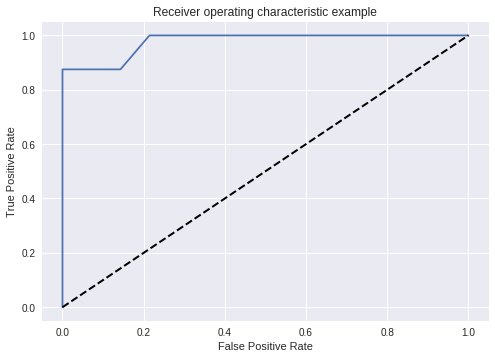

In [10]:
# Base case:
false_positives = np.sum(predictions['0.1']-train_y.values>1)
true_positives = np.sum(predictions['0.1']+train_y.values==2)
print('False positive rate at threshold 0.1: ',false_positives/np.sum(train_y==0))
print('True positive rate at threshold 0.1: ',true_positives/np.sum(train_y==1))

# Now automate the base case across the set of all decision thresholds
fp = pd.DataFrame()
tp = pd.DataFrame()
for threshold in predictions.columns:
    fp[threshold] = [np.sum(predictions[threshold]-train_y.values==1)/np.sum(train_y==0)]
    tp[threshold] = [np.sum(predictions[threshold]+train_y.values==2)/np.sum(train_y==1)]

# The false positives and true positive rated, based on the sliding decision threshold
print(fp.T)
print(tp.T)

import matplotlib.pyplot as plt
plt.plot(fp.T,tp.T);
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
    

### 4. Example using sklearn

In [0]:
from sklearn import metrics

0.9776785714285714
0.9732142857142857
[0.         0.         0.21428571 0.21428571 1.        ]
[0.0625 0.875  0.875  1.     1.    ]


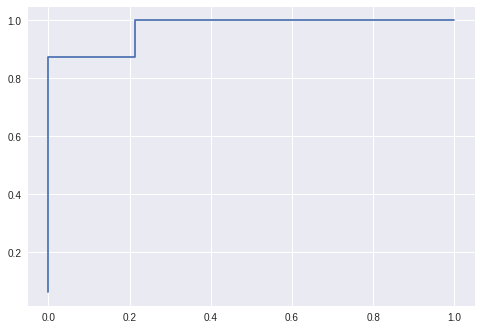

In [12]:
# The Area-Under-The-Curve Score
print(metrics.auc(fp.T,tp.T))
print(metrics.roc_auc_score(train_y.values,proba[::,1:2:]))

# Producing the same false/true positive data via a library and plotting it
fpr, tpr, _ = metrics.roc_curve(train_y.values,proba[::,1:2:])
print(fpr)
print(tpr)
plt.plot(fpr,tpr);

## Do

### 5. Compute the ROC and AUC using the _testset_ instead of the _trainset_


In [0]:
# Compute and plot